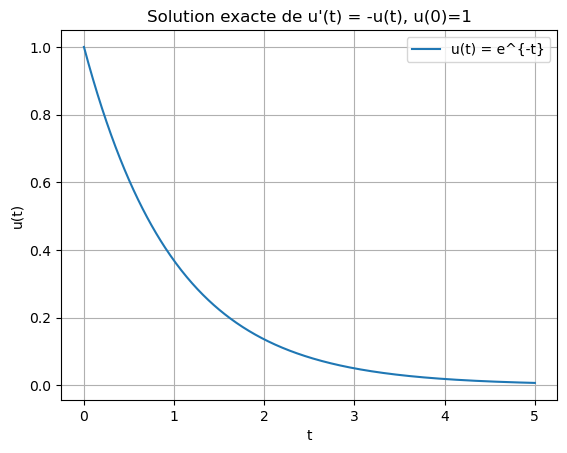

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
t_max = 5.0
dt = 0.01
t = np.arange(0, t_max + dt, dt)

# Solution exacte : u(t) = exp(-t)
u = np.exp(-t)

# Affichage
plt.plot(t, u, label="u(t) = e^{-t}")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Solution exacte de u'(t) = -u(t), u(0)=1")
plt.legend()
plt.grid(True)
plt.show()

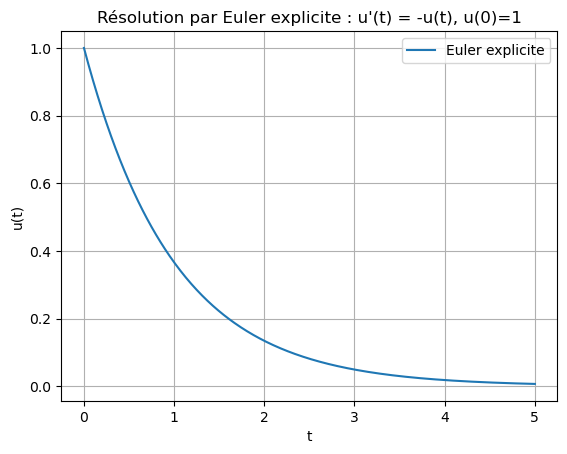

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du problème
lam = 1.0      # lambda = 1
u0 = 1.0       # condition initiale
t_max = 5.0    # temps final
dt = 0.01      # pas de temps

# Grille de temps
t = np.arange(0, t_max + dt, dt)

# Initialisation
u = np.zeros_like(t)
u[0] = u0

# Schéma d'Euler explicite : u_{n+1} = u_n - dt * lambda * u_n
for n in range(len(t) - 1):
    u[n + 1] = u[n] - dt * lam * u[n]

# Affichage
plt.plot(t, u, label="Euler explicite")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Résolution par Euler explicite : u'(t) = -u(t), u(0)=1")
plt.legend()
plt.grid(True)
plt.show()


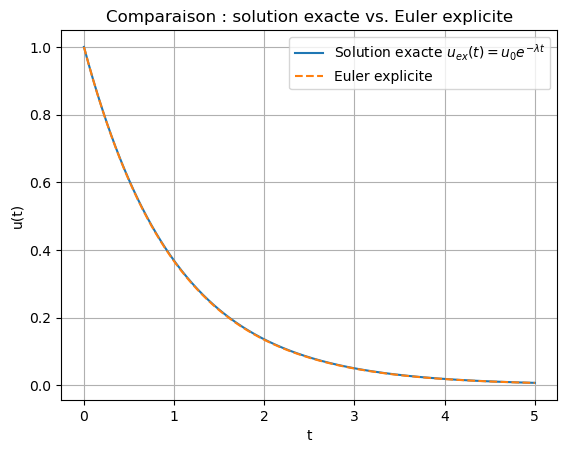

Erreur maximale : 1.847e-03


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres ---
lam = 1.0      # λ = 1
u0 = 1.0       # u(0) = 1
t_max = 5.0    # temps final
dt = 0.01      # pas de temps

# --- Grille temporelle ---
t = np.arange(0, t_max + dt, dt)

# --- Schéma d’Euler explicite ---
u_euler = np.zeros_like(t)
u_euler[0] = u0
for n in range(len(t) - 1):
    u_euler[n + 1] = u_euler[n] - dt * lam * u_euler[n]

# --- Solution exacte ---
u_exact = u0 * np.exp(-lam * t)

# --- Calcul de l’erreur ---
erreur = np.abs(u_exact - u_euler)

# --- Affichage ---
plt.plot(t, u_exact, label="Solution exacte $u_{ex}(t)=u_0 e^{-\\lambda t}$")
plt.plot(t, u_euler, '--', label="Euler explicite")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Comparaison : solution exacte vs. Euler explicite")
plt.legend()
plt.grid(True)
plt.show()

# --- Affichage de l’erreur max ---
print(f"Erreur maximale : {np.max(erreur):.3e}")


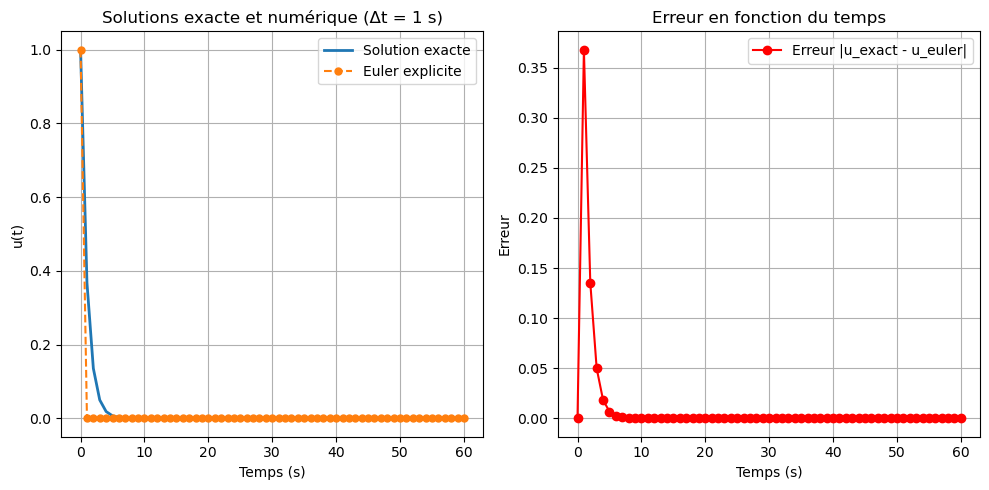

Erreur maximale : 3.679e-01


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres ---
lam = 1.0       # λ = 1
u0 = 1.0        # condition initiale
t_max = 60.0    # 1 minute = 60 secondes
dt = 1.0        # pas de temps = 1 s

# --- Grille temporelle ---
t = np.arange(0, t_max + dt, dt)

# --- Schéma d’Euler explicite ---
u_euler = np.zeros_like(t)
u_euler[0] = u0
for n in range(len(t) - 1):
    u_euler[n + 1] = u_euler[n] - dt * lam * u_euler[n]

# --- Solution exacte ---
u_exact = u0 * np.exp(-lam * t)

# --- Erreur ---
erreur = np.abs(u_exact - u_euler)

# --- Tracé des solutions ---
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u_exact, label="Solution exacte", linewidth=2)
plt.plot(t, u_euler, 'o--', label="Euler explicite", markersize=5)
plt.xlabel("Temps (s)")
plt.ylabel("u(t)")
plt.title("Solutions exacte et numérique (Δt = 1 s)")
plt.legend()
plt.grid(True)

# --- Tracé de l’erreur ---
plt.subplot(1, 2, 2)
plt.plot(t, erreur, 'r-o', label="Erreur |u_exact - u_euler|")
plt.xlabel("Temps (s)")
plt.ylabel("Erreur")
plt.title("Erreur en fonction du temps")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Erreur maximale ---
print(f"Erreur maximale : {np.max(erreur):.3e}")


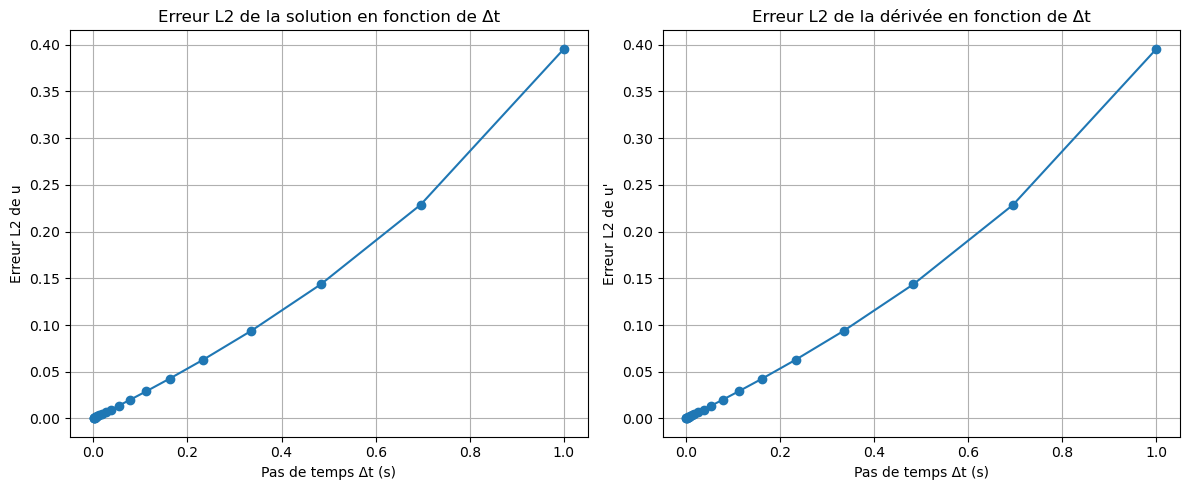

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Problème ---
lam = 1.0
u0 = 1.0
T = 60.0  # 1 minute = 60 s

# 20 pas de temps décroissants de 1 à 1e-3
dt_values = np.logspace(0, -3, 20)  # [1, ..., 1e-3] décroissant

errL2_u = []    # erreurs L2 pour u
errL2_du = []   # erreurs L2 pour u'

for dt in dt_values:
    # Grille temporelle
    t = np.arange(0.0, T + dt, dt)

    # Euler explicite pour u' = -u
    u = np.zeros_like(t)
    u[0] = u0
    for n in range(len(t) - 1):
        u[n+1] = u[n] - dt * lam * u[n]

    # Solution exacte
    u_exact = u0 * np.exp(-lam * t)

    # Erreur L2 pour la fonction u
    e_u = u_exact - u
    errL2_u.append(np.sqrt(np.sum(e_u**2) * dt))

    # Dérivée exacte et numérique (différence avant)
    # u'_exact(t) = -exp(-t)
    t_d = t[:-1]                         # temps des dérivées discrètes
    du_exact = -np.exp(-t_d)
    du_num = (u[1:] - u[:-1]) / dt       # dérivée numérique (diff. avant)

    # Erreur L2 pour la dérivée
    e_du = du_exact - du_num
    errL2_du.append(np.sqrt(np.sum(e_du**2) * dt))

# --- Tracés côte à côte ---
plt.figure(figsize=(12,5))

# Erreur L2 de u
plt.subplot(1,2,1)
plt.plot(dt_values, errL2_u, 'o-')
plt.xlabel("Pas de temps Δt (s)")
plt.ylabel("Erreur L2 de u")
plt.title("Erreur L2 de la solution en fonction de Δt")
plt.grid(True)

# Erreur L2 de u'
plt.subplot(1,2,2)
plt.plot(dt_values, errL2_du, 'o-')
plt.xlabel("Pas de temps Δt (s)")
plt.ylabel("Erreur L2 de u'")
plt.title("Erreur L2 de la dérivée en fonction de Δt")
plt.grid(True)

plt.tight_layout()
plt.show()


dx=1.000e-02, dy=1.000e-02, dt_num=1.000e-02 (Nt=200), dt_ref=1.000e-03 (Nt=2000)
Norme L2 de l'erreur ||u_num - u_ref||_L2 = 5.311e-07


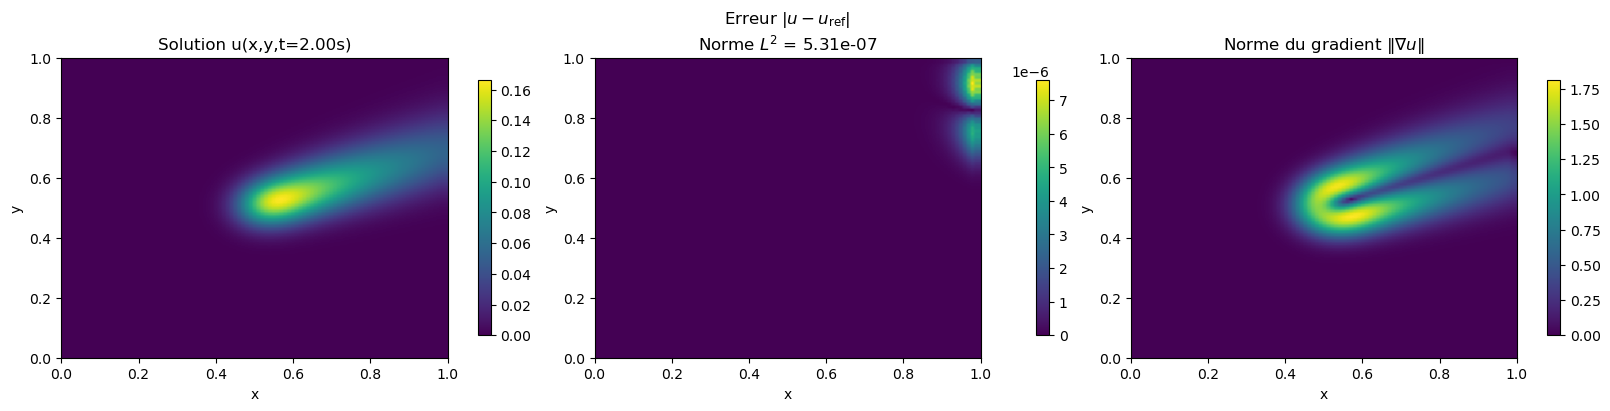

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Paramètres du problème
# =========================
# Domaine rectangulaire
x0, x1 = 0.0, 1.0
y0, y1 = 0.0, 1.0
Nx, Ny = 101, 101
dx = (x1 - x0) / (Nx - 1)
dy = (y1 - y0) / (Ny - 1)

# Vitesse V = (v1, v2)
v1, v2 = 0.5, 0.2

# Diffusivité et réaction
nu  = 1e-3
lam = 1.0

# Source gaussienne f(x,y) = Tc * exp(-k * ||s - sc||^2)
Tc = 1.0
k  = 200.0
sc1, sc2 = 0.5, 0.5

# Condition initiale
def u_init(X, Y):
    return np.zeros_like(X)

# Valeur Dirichlet sur bords entrants
u_in = 0.0

# Temps de simulation
Tfin = 2.0         # secondes
dt_user = None     # si None: dt auto stable
C_cfl, C_diff = 0.5, 0.4  # marges de stabilité

# =========================
# Grille et source
# =========================
x = np.linspace(x0, x1, Nx)
y = np.linspace(y0, y1, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')
f = Tc * np.exp(-k * ((X - sc1)**2 + (Y - sc2)**2))

# =========================
# Outils numériques
# =========================
def stable_dt(dx, dy, v1, v2, nu, Cc=0.5, Cd=0.4):
    dt_conv = np.inf
    if abs(v1) > 0: dt_conv = min(dt_conv, Cc * dx / abs(v1))
    if abs(v2) > 0: dt_conv = min(dt_conv, Cc * dy / abs(v2))
    dt_diff = np.inf
    if nu > 0: dt_diff = Cd / (nu * (1.0/dx**2 + 1.0/dy**2))
    dt_stable = min(dt_conv, dt_diff)
    return 1e-3 if np.isinf(dt_stable) else dt_stable

def apply_boundary_conditions(u):
    # Bords entrants: Dirichlet u=u_in ; sortants: Neumann 0 (copie voisine)
    # Gauche (n=(-1,0)): inflow si v1>0
    if v1 > 0: u[0,  :]  = u_in
    else:      u[0,  :]  = u[1,  :]
    # Droite (n=(1,0)): inflow si v1<0
    if v1 < 0: u[-1, :]  = u_in
    else:      u[-1, :]  = u[-2, :]
    # Bas (n=(0,-1)): inflow si v2>0
    if v2 > 0: u[:,  0]  = u_in
    else:      u[:,  0]  = u[:,  1]
    # Haut (n=(0,1)): inflow si v2<0
    if v2 < 0: u[:, -1]  = u_in
    else:      u[:, -1]  = u[:, -2]

def convective_upwind(u, v1, v2, dx, dy):
    # Upwind 1er ordre (vectorisé)
    ux_plus  = (u - np.roll(u, 1, axis=0)) / dx     # diff arrière
    ux_minus = (np.roll(u, -1, axis=0) - u) / dx    # diff avant
    uy_plus  = (u - np.roll(u, 1, axis=1)) / dy
    uy_minus = (np.roll(u, -1, axis=1) - u) / dy
    ux = np.where(v1 >= 0, ux_plus,  ux_minus)
    uy = np.where(v2 >= 0, uy_plus,  uy_minus)
    return v1 * ux + v2 * uy

def laplacian(u, dx, dy):
    u_xx = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2
    u_yy = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2
    return u_xx + u_yy

def solve_explicit(dt, Tfin, u0, f):
    Nt = int(np.ceil(Tfin / dt))
    dt = Tfin / Nt   # ajuste pour tomber sur Tfin exactement
    u = u0.copy()
    t = 0.0
    apply_boundary_conditions(u)
    for _ in range(Nt):
        apply_boundary_conditions(u)
        conv = convective_upwind(u, v1, v2, dx, dy)
        diff = laplacian(u, dx, dy)
        rhs  = -conv + nu * diff - lam * u + f
        u    = u + dt * rhs
        t   += dt
    apply_boundary_conditions(u)
    return u, t, dt, Nt

def grad_central(u, dx, dy):
    # Gradient centré (traitement simple des bords)
    ux = (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0)) / (2*dx)
    uy = (np.roll(u, -1, axis=1) - np.roll(u, 1, axis=1)) / (2*dy)
    ux[0 , :] = (u[1 , :] - u[0 , :]) / dx
    ux[-1, :] = (u[-1, :] - u[-2, :]) / dx
    uy[:, 0 ] = (u[:, 1 ] - u[:, 0 ]) / dy
    uy[:, -1] = (u[:, -1] - u[:, -2]) / dy
    return ux, uy

def L2_norm(field, dx, dy):
    return np.sqrt(np.sum(field**2) * dx * dy)

# =========================
# Simulation (solution num. & référence)
# =========================
Xg, Yg = np.meshgrid(x, y, indexing='ij')
u0 = u_init(Xg, Yg)

dt_num = stable_dt(dx, dy, v1, v2, nu, C_cfl, C_diff) if dt_user is None else dt_user
u_num, t_end, dt_num, Nt_num = solve_explicit(dt_num, Tfin, u0, f)

# Référence temporelle plus fine (même maillage espace)
dt_ref = dt_num / 10.0
u_ref, _, dt_ref, Nt_ref = solve_explicit(dt_ref, Tfin, u0, f)

# =========================
# Erreur et gradient
# =========================
err_field = u_num - u_ref
err_L2    = L2_norm(err_field, dx, dy)

ux_num, uy_num = grad_central(u_num, dx, dy)
grad_norm_num  = np.sqrt(ux_num**2 + uy_num**2)

print(f"dx={dx:.3e}, dy={dy:.3e}, dt_num={dt_num:.3e} (Nt={Nt_num}), dt_ref={dt_ref:.3e} (Nt={Nt_ref})")
print(f"Norme L2 de l'erreur ||u_num - u_ref||_L2 = {err_L2:.3e}")

# =========================
# 3 figures côte à côte
# =========================
fig, axes = plt.subplots(1, 3, figsize=(16, 4), constrained_layout=True)

# (1) Solution numérique
im0 = axes[0].imshow(u_num.T, origin='lower', extent=[x0, x1, y0, y1], aspect='auto')
axes[0].set_title(f"Solution u(x,y,t={t_end:.2f}s)")
axes[0].set_xlabel("x"); axes[0].set_ylabel("y")
plt.colorbar(im0, ax=axes[0], shrink=0.85)

# (2) Erreur ponctuelle et norme L2
im1 = axes[1].imshow(np.abs(err_field).T, origin='lower', extent=[x0, x1, y0, y1], aspect='auto')
axes[1].set_title(r"Erreur $|u-u_{\rm ref}|$" + "\n" + rf"Norme $L^2$ = {err_L2:.2e}")
axes[1].set_xlabel("x"); axes[1].set_ylabel("y")
plt.colorbar(im1, ax=axes[1], shrink=0.85)

# (3) Norme du gradient
im2 = axes[2].imshow(grad_norm_num.T, origin='lower', extent=[x0, x1, y0, y1], aspect='auto')
axes[2].set_title(r"Norme du gradient $\|\nabla u\|$")
axes[2].set_xlabel("x"); axes[2].set_ylabel("y")
plt.colorbar(im2, ax=axes[2], shrink=0.85)

plt.show()


In [13]:
import sympy as sp

# Variables et paramètres
x = sp.Symbol('x', real=True)
u_l, g, L = sp.symbols('u_l g L', real=True)

# Proposition pour u0
u0 = u_l + g * x

# Vérification des conditions aux limites
u0_left = u0.subs(x, 0)        # u0(0)
u0_right_deriv = sp.diff(u0, x).subs(x, L)  # u0'(L)

print("u0(x) =", u0)
print("u0(0) =", u0_left)
print("u0'(L) =", u0_right_deriv)


u0(x) = g*x + u_l
u0(0) = u_l
u0'(L) = g
